<div style="text-align: right"> 06.12.2019</div>

***Name:*** 

# Hausaufgabe Blatt 7

## Pendel: Energie

In dieser Aufgabe werden wir erneut die Bewegungsgleichung eines Pendels numerisch lösen und dabei dieses mal die Energie des Systems betrachten. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Die nach dem Euler Verfahren diskretisierte Gleichungen lauten:

\begin{align*}
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{1} \\
        \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + 
        \omega\left(t\right) \cdot \Delta t \tag{2}
\end{align*}

Die potentielle Energie $E_p$ und die kinetische Energie $E_{kin}$ sind gegeben durch:
\begin{align*}
E_p &= m \cdot g \cdot L \left( 1 - \cos \varphi \right) \\
E_{kin} &= \frac{m}{2} v^2 = \frac{m}{2}L^2 \dot \varphi ^2
\end{align*}

Die konstante Gesamtenergie ist durch die potentielle Energie bei anfänglicher Auslenkung $\varphi_0$ gegeben
\begin{align*}
E = m \cdot g \cdot L\left(1-\cos \varphi_0\right). \tag{3}
\end{align*}



### 1. Numerische Integration
Auf Blatt 6 haben Sie die Pendelgleichungen (1 + 2) numerisch integriert. Der Code dafür steht in der folgenden Zelle. Führen Sie diesen aus, bevor Sie bei "2. Energie" weiterarbeiten. Hier haben wir $N=2000$ Zeitschritte, wobei $\Delta t=0.004$, $\omega(t=0)=0$ und $\varphi_0 = \varphi(t=0)=\pi/4$ sein soll. Die Länge des Pendels ist $L=1$, die Masse $m=1$ und $g$ die Erdbeschleunigung.  


In [1]:
# numerische Integration der Schwingungsgleichung eines mathematischen Pendels
import numpy as np # lade Bibliotheken

L = 1 # Pendellänge
g = 9.81 # Erdbeschleunigung
m = 1 # Masse
N = 2000 # Anzahl Zeitschritte

dt = 0.004 # Zeitintervall 
w = 0 # Winkelgeschwindigkeit 
phi = (np.pi/4) # Winkel 
t = np.linspace(0, N*dt, N+1) # Zeit
resultsw = [0] # Liste für berechnete Winkelgeschwindigkeit
resultsphi = [np.pi/4] # Liste für berechnete Winkel


for i in range(N): # for-Schleife zur Aktualisierung der Winkelgeschwindigkeit und des Winkels
    wtemp = w # Zwischenspeichern der Winkelgeschwindigkeit, damit phi nicht mit dem aktualisierten omega berechnet wird
    w = w - g/L*np.sin(phi)*dt # update omage
    resultsw.append(w) # speichere omega
    phi = phi+wtemp*dt # update phi
    resultsphi.append(phi) # speichere phi


## 2. Energie
**a)** Schreiben Sie eine Funktion, die Ihnen die potentielle, kinetische und gesamte Energie abhängig vom Winkel $\varphi$ und der Winkelgeschwindigkeit $\omega$ berechnet und zurück gibt.

In [5]:
import numpy as np
m=1 #Masse
g=9.81#Erdbeschleunigung
L=1 #Pendellänge 
def E(phi,w): #Schleife
    Ep= m*g*L*(1-np.cos(phi)) #Berechnung der Epot
    print(Ep)    
    Ek=m/2*L**2*w**2 #Berechnug der EKin
    print(Ek)
    Eg= Ep + Ek #Berechnung der Eges
    print(Eg)
                        
   #Und jeweils print                     
#E(phi,0)#Zum Ausführen der Funktion

**b)** Plotten Sie die kinetische, potentielle und gesamte Energie gegen die Zeit. Vergleichen Sie das Ergebnis mit der erwarteten gesamten Energie (Gleichung (3)). Warum sehen Sie eine Abweichung?

Benutzen Sie zum plotten einer horizontalen Linie `ax.hlines(value, xStart, xEnd)`, wobei `value` der y-Wert und `xStart` und `xEnd` die Anfangs- und End-Punkte der Linie sind.

<function matplotlib.pyplot.show(close=None, block=None)>

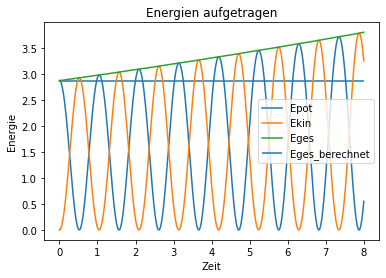

In [14]:
import matplotlib.pyplot as plt #Import
fig, ax = plt.subplots()

#Listen:
Etp=[]  #Werte Epot nach der Zeit t
Etk=[]  #Werte Ekin nach der Zeit t
Etg=[]  #Werte Eges nach der Zeit t
for i in range (N+1): #Schleife, die Werte in Abhängikeit der winkel/WInkelgeschwindigkeit berechnet. Werte kommen aus Aufgabenstellung oben
    etp=m*g*L*(1-np.cos(resultsphi[i]))
    Etp.append(etp) #Epot nach t zurück in die Liste
    etk=m/2*L**2*resultsw[i]**2
    Etk.append(etk) #Ekin nach t  zurück in die Liste
    etg=etp + etk
    Etg.append(etg) #Eges nach t zuürck in die Liste

ax.set_title("Energien aufgetragen") #Eckdaten des Plots
ax.set_xlabel("Zeit")
ax.set_ylabel("Energie")


ax.plot(t,Etp,label='Epot') #Plot f+r Epot
ax.plot(t,Etk,label='Ekin') #plot für Ekin
ax.plot(t,Etg,label='Eges') # Plot für e Ges
#ax.hlines(2.8733,0,8,label='Ep berechnet') #Plot für die theoretish berechnete E gesamt
ax.hlines(2.8733,t[0],t[-1],label='Eges_berechnet')
ax.legend(loc='best') #Anzeigen de Legende
plt.show #Anzeige des Plots

#Die Diskreptanz entsteht durch das Verfahren zum berechnen der Winkel/Winekgeschwindigkeit. Wenn man diese plotett stellt man fest, dass deren Ampltitude ebenfalls steigt.
#plt.plot(t,resultsphi)
#plt.show